In [405]:
% matplotlib inline
import os
import logging
import pickle
import matplotlib.pyplot as plt
from collections import Counter
import importlib

import IPython.display as ipd

import pandas as pd
import librosa

from sklearn.metrics import log_loss, accuracy_score, classification_report, roc_auc_score

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

import feature_engineering
import train_test_set
import lib

In [337]:

X_train, X_test, y_train, y_test = train_test_set.get_train_test_set(feature_version='feature_vector')#'feature_vector')

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

svc.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = svc.predict(X_test_scaled)

parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.01, 0.1, 1, 10, 100]}

svcgs = SVC()
clf = GridSearchCV(svcgs, param_grid=parameters, cv=5)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))




             precision    recall  f1-score   support

        0.0       0.91      1.00      0.95        68
        1.0       1.00      0.86      0.92        50

avg / total       0.95      0.94      0.94       118



In [338]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_set.get_train_test_set(feature_version='feature_vector')#'feature_vector')

In [408]:
def model(X_train, X_test, y_train, y_test):
    """
    Create a pipeline and train a grid searched model
    :param train:
    :param test:
    :return:
    """
    
    pickle_root = '../data/pickles/'

    logging.info('Begin model')

    # Train scaler
    scaler = StandardScaler().fit(X_train)
    
    X_train_scaled = scaler.transform(X_train)


    #svc.fit(X_train_scaled, y_train)

    #y_pred = svc.predict(X_test_scaled)

    parameters = {'kernel':('linear', 'rbf'), 
                  'C':[0.01, 0.1, 1, 10, 100]}

    clf = GridSearchCV(SVC(), param_grid=parameters, cv=5)
    trained_model = clf.fit(X_train_scaled, y_train)
    
    # Validate on X_test:
    X_test_scaled = scaler.transform(X_test)
    y_pred = trained_model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    
    logging.info('Training model')
    #trained_model.fit(X_train, y_train)

    # Set prediction
    #for data_set in [X_train, X_test]:
    #    data_set['pred'] = trained_model.predict(data_set)

    # lib.archive_dataset_schemas('model', locals(), globals())
    logging.info('End model')
    
    lib.dump_pickle(pipe, pickle_root+'linear_pipe.pkl')
    
    lib.dump_pickle(scaler, pickle_root+'linear_scaler.pkl')
    lib.dump_pickle(trained_model, pickle_root+'linear_trained_model.pkl')

    
    #def predict_from_model()
    
    return scaler, trained_model

scaler, trained_model = model(X_train, X_test, y_train, y_test)

y_pred = trained_model.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred*0))

             precision    recall  f1-score   support

        0.0       0.91      1.00      0.95        68
        1.0       1.00      0.86      0.92        50

avg / total       0.95      0.94      0.94       118

             precision    recall  f1-score   support

        0.0       0.58      1.00      0.73        68
        1.0       0.00      0.00      0.00        50

avg / total       0.33      0.58      0.42       118



/Users/timcodes/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [387]:
X_test

,mfcc_00,mfcc_01,mfcc_02,mfcc_03,mfcc_04,mfcc_05,mfcc_06,mfcc_07,mfcc_08,mfcc_09,mfcc_10,mfcc_11,mfcc_12,rmse,spectral_bandwidth,spectral_centroid,spectral_rolloff,zcr
399,-799.234215,95.498706,-45.586596,-0.594639,3.008192,-22.615256,1.674619,-2.818343,-8.865447,0.737509,-7.278895,-4.219550,1.880438,0.000059,5152.682474,4719.964283,13438.942837,0.109901
466,-796.725999,101.165108,-40.824812,-0.263610,3.839256,-20.153047,4.212152,-1.855555,-9.182819,2.839219,-6.638737,-5.802117,1.516796,0.000061,5166.292034,4607.731406,13358.370241,0.101550
192,-325.619901,146.600443,-7.459069,11.633302,-10.441529,-9.944365,-0.875261,-3.480066,1.303657,-5.701024,-4.119100,-12.445009,-11.166960,0.047376,2397.015872,1860.038555,5082.543601,0.042535
154,-254.486708,164.256591,-5.620965,25.222363,-1.662740,9.995824,3.084065,3.485715,2.013769,-1.581104,1.750042,-1.011087,2.636854,0.066741,2732.572796,1990.765251,5406.502049,0.042889
570,-676.255790,74.520017,-23.748623,-4.681455,8.409231,-8.023407,-8.643983,-11.666631,-12.603982,-6.563530,-6.091238,-5.269838,-2.002035,0.002668,3803.208285,3410.615976,7188.399882,0.093693
529,-769.510524,122.347738,-37.091641,8.613007,12.867027,-19.979311,-0.182900,-10.012595,-18.382292,-1.912563,-8.275135,-7.102025,0.928686,0.000102,4655.370656,3773.305974,9942.577437,0.082769
415,-775.227518,112.974545,-45.616604,-0.327524,0.795422,-27.939365,-0.808787,-5.823552,-11.935359,1.930938,-6.787210,-5.748861,1.669900,0.000237,4699.559760,4133.412346,11291.536573,0.098628
435,-716.088600,106.679339,-43.683116,-0.320637,2.088217,-27.136413,-4.742441,-5.942380,-9.996641,1.599767,-3.769963,-2.693501,2.830004,0.000990,4158.435370,3773.671476,10087.598000,0.091285
245,-335.474228,125.338712,-10.709552,12.102313,-13.404530,-12.296720,0.365924,-5.895774,-1.179867,-5.885643,-3.465191,-7.179544,-7.263350,0.036284,2707.972109,2388.386940,6400.668808,0.056344
416,-698.845676,108.901404,-34.005070,-5.949146,-2.645922,-33.084145,-14.487385,-9.965033,-15.135843,-2.154398,-1.357664,-2.013404,3.173169,0.000811,3686.732856,3185.497198,7185.821963,0.083769


In [395]:
df_scale = pd.DataFrame(scaler.transform(X_test))
df_scale.head(3)
df_scale.std()
df_scale.mean()

0     0.048399
1     0.174844
2    -0.105680
3    -0.081526
4    -0.165091
5    -0.065606
6    -0.114154
7    -0.099913
8    -0.051860
9     0.020057
10   -0.040540
11    0.076114
12   -0.005856
13    0.054931
14    0.023546
15    0.008065
16    0.032528
17   -0.024981
dtype: float64

In [369]:
A = X_test.loc[399].values
A = A.reshape(1,-1)
#np.reshape(A, (-1, 2))

In [370]:
A

array([[-7.99234215e+02,  9.54987062e+01, -4.55865964e+01,
        -5.94639348e-01,  3.00819188e+00, -2.26152561e+01,
         1.67461897e+00, -2.81834294e+00, -8.86544663e+00,
         7.37508635e-01, -7.27889452e+00, -4.21955027e+00,
         1.88043787e+00,  5.91021303e-05,  5.15268247e+03,
         4.71996428e+03,  1.34389428e+04,  1.09901106e-01]])

In [371]:
y_pred = trained_model.predict(scaler.transform(A)) 

In [372]:
y_pred

array([0.])

In [396]:
#folder = '../data/live_stream_conversions/'
folder = '../data/trial_data/crying/'

tmp_file = folder + 'out00021.wav'


prediction_results = []
for file in os.listdir(folder):
            if file != '.DS_Store':
                # raw, sr = librosa.load(folder+file, sr=44100)
                f = feature_engineering.Features(folder+file)
                feature_vector, feature_matrix = f.engineer_features()
                pred = trained_model.predict(scaler.transform(feature_vector.reshape(1,-1))) 
                prediction_results.append((file,pred))


In [397]:
ipd.Audio(tmp_file)

In [404]:
f = feature_engineering.Features(tmp_file)

feature_vector, feature_matrix = f.engineer_features()
print(f.raw_audio_vec.shape)
print(feature_vector.shape)
print(feature_matrix.shape)

pred = trained_model.predict(scaler.transform(feature_vector.reshape(1,-1)))

pred

(218111,)
(18,)
(18, 426)


array([0.])

In [384]:
prediction_results

[('out00006.wav', array([0.])),
 ('out00007.wav', array([0.])),
 ('out00008.wav', array([0.])),
 ('out00009.wav', array([0.])),
 ('out00010.wav', array([0.])),
 ('out00011.wav', array([0.])),
 ('out00013.wav', array([0.])),
 ('out00014.wav', array([0.])),
 ('out00015.wav', array([0.])),
 ('out00016.wav', array([0.])),
 ('out00017.wav', array([0.])),
 ('out00018.wav', array([0.])),
 ('out00019.wav', array([0.])),
 ('out00020.wav', array([0.])),
 ('out00021.wav', array([0.])),
 ('out00022.wav', array([0.])),
 ('out00023.wav', array([0.])),
 ('out00024.wav', array([0.])),
 ('out00025.wav', array([0.])),
 ('out00026.wav', array([0.])),
 ('out00027.wav', array([0.])),
 ('out00028.wav', array([0.])),
 ('out00029.wav', array([0.])),
 ('out00030.wav', array([0.])),
 ('out00031.wav', array([0.])),
 ('out00032.wav', array([0.])),
 ('out00033.wav', array([0.])),
 ('out00034.wav', array([0.])),
 ('out00035.wav', array([0.])),
 ('out00036.wav', array([0.])),
 ('out00037.wav', array([0.])),
 ('out00

In [385]:
trained_model.predict(scaler.transform(feature_vector.reshape(1,-1))) 

array([0.])

In [ ]:
pipe.transform()

In [341]:
trained_model.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [327]:
#estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = make_pipeline()

param_grid = dict(reduce_dim=[None, PCA(5), PCA(10)],
                  clf=[SVC(), LogisticRegression()],
                  clf__C=[0.1, 10, 100])
grid_search = GridSearchCV(pipe, param_grid=param_grid)

ValueError: not enough values to unpack (expected 2, got 0)

218111
218111
218111
218111
217325
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
218111
107252


In [329]:
df_raw.shape

(586, 218001)

In [254]:
df_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,220151,220152,220153,220154,220155,220156,220157,220158,220159,220160
0,1.0,-0.000122,-0.000183,-0.000183,-0.000153,-0.000153,-0.000153,-0.000153,-0.000122,0.000000,...,0.000031,0.000061,0.000061,0.000092,0.000092,0.000092,0.000061,0.000061,0.000031,0.000000
1,1.0,-0.000031,-0.000061,-0.000061,-0.000031,-0.000031,-0.000031,-0.000061,-0.000092,-0.000122,...,0.000061,0.000092,0.000092,0.000031,0.000000,-0.000031,-0.000031,-0.000031,-0.000031,-0.000031
2,1.0,-0.000061,-0.000092,-0.000122,-0.000153,-0.000122,-0.000061,0.000000,0.000061,0.000092,...,0.000244,0.000214,0.000183,0.000122,0.000031,-0.000031,-0.000061,-0.000092,-0.000092,-0.000061
3,1.0,-0.000031,0.000000,0.000061,0.000061,0.000061,0.000031,-0.000031,-0.000092,-0.000153,...,0.000153,0.000153,0.000153,0.000122,0.000092,0.000000,-0.000061,-0.000092,-0.000061,0.000031
4,1.0,-0.000427,-0.000366,-0.000122,0.000153,0.000397,0.000427,0.000275,-0.000092,-0.000458,...,-0.005371,-0.005768,-0.005219,-0.003784,-0.001801,0.000061,0.001129,0.001099,-0.000031,-0.001831


In [263]:
raw_vector[0][:221184-4].shape

(221180,)

In [51]:
df = pd.DataFrame(raw_audio_data, columns=['label', 'raw_audio', 'sampling_rate'])
df = df[df['vec_len']>=220160]  # drop all vecs shorter than 220160 sample points

<module 'feature_engineering' from '/Users/timcodes/ds/metis/metisgh/05_Kojak/WeeBro/bin/feature_engineering.py'>

In [214]:
%%time
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1),
                                                    df['label'], 
                                                    test_size=0.2)


scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

svc.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = svc.predict(X_test_scaled)

parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1, 10, 100]}
svcgs = SVC()
clf = GridSearchCV(svcgs, parameters, cv=5)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

        0.0       0.93      0.98      0.96        65
        1.0       0.98      0.91      0.94        53

avg / total       0.95      0.95      0.95       118

CPU times: user 706 ms, sys: 4.32 ms, total: 710 ms
Wall time: 721 ms


In [ ]:
pipe = Pipeline()

In [ ]:
clf = svm.SVC(kernel='linear')
pipe = Pipeline([('anova', anova_filter), ('svc', clf)])
# You can set the parameters using the names issued
# For instance, fit using a k of 10 in the SelectKBest
# and a parameter 'C' of the svm
anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)
                     



prediction = anova_svm.predict(X)
anova_svm.score(X, y)                        


In [ ]:
pipe = Pipeline([
                ('reduce_dim', PCA()),
                ('classify', LinearSVC())
            ])

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
digits = load_digits()
grid.fit(digits.data, digits.target)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)

<class 'numpy.ndarray'> (1025, 431) 15.781399 -64.2186


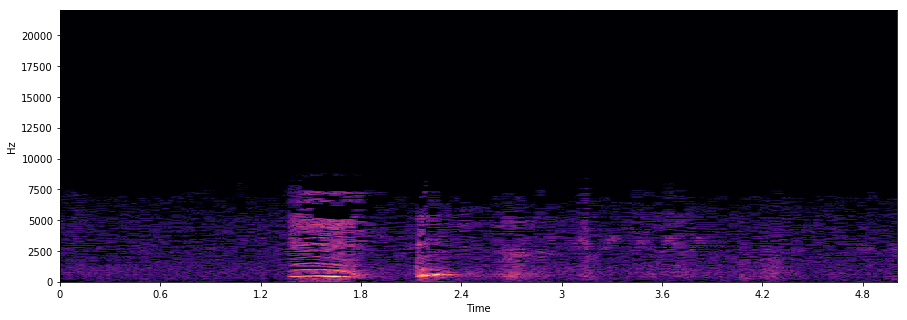

In [97]:
S = librosa.amplitude_to_db(abs(X))
print(type(S),S.shape, S.max(), S.min())

plt.figure(figsize=(15, 5))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')

In [98]:
S

array([[-54.485836, -62.160904, -64.2186  , ..., -64.2186  , -54.38948 ,
        -47.878414],
       [-53.81979 , -59.034916, -64.2186  , ..., -64.2186  , -53.025826,
        -45.900642],
       [-53.291466, -59.279057, -64.2186  , ..., -50.016945, -47.34986 ,
        -46.201363],
       ...,
       [-64.2186  , -64.2186  , -64.2186  , ..., -64.2186  , -64.2186  ,
        -64.2186  ],
       [-64.2186  , -64.2186  , -64.2186  , ..., -64.2186  , -64.2186  ,
        -64.2186  ],
       [-64.2186  , -64.2186  , -64.2186  , ..., -64.2186  , -64.2186  ,
        -64.2186  ]], dtype=float32)

In [99]:
S1

array([[1.8867230e-03, 7.7974919e-04, 3.1859204e-04, ..., 1.9189759e-04,
        1.9077692e-03, 4.0371912e-03],
       [2.0370912e-03, 1.1175172e-03, 1.4965958e-04, ..., 5.4216034e-05,
        2.2320745e-03, 5.0695338e-03],
       [2.1648449e-03, 1.0865437e-03, 1.2822979e-04, ..., 3.1561144e-03,
        4.2904895e-03, 4.8970194e-03],
       ...,
       [2.5215882e-04, 1.2935848e-04, 1.7410316e-04, ..., 1.5223165e-04,
        2.6926372e-04, 3.9335192e-04],
       [2.9504715e-04, 3.0656139e-04, 2.3115681e-04, ..., 1.0605803e-04,
        2.4037137e-04, 3.3937808e-04],
       [2.3181258e-04, 6.0356902e-05, 3.6950648e-04, ..., 2.2343046e-04,
        8.3969899e-06, 2.1866465e-04]], dtype=float32)

## The Mel-Spectrogram

(128, 861)

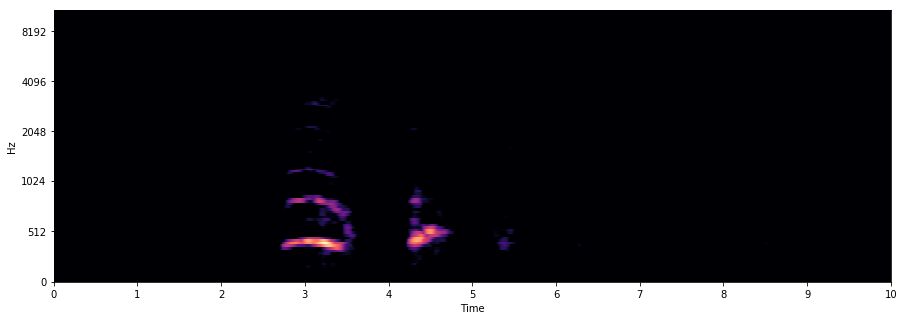

In [104]:
MS = librosa.feature.melspectrogram(y, sr=sr, n_fft=4096, hop_length=256)
logS = librosa.amplitude_to_db(MS)

plt.figure(figsize=(15, 5))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='mel')

logS.shape

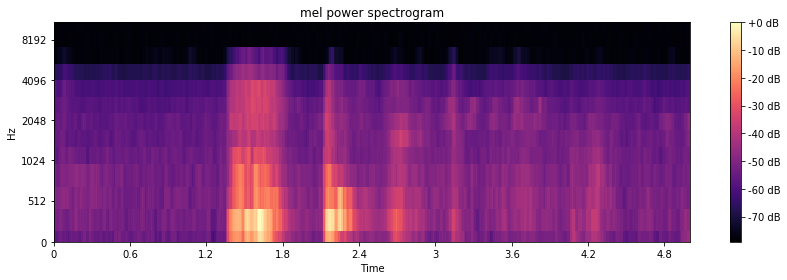

In [106]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=13)#128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()


In [122]:
mfccs = librosa.feature.mfcc(y, n_mfcc=20, sr=sr)
print(mfccs.shape)

(20, 431)


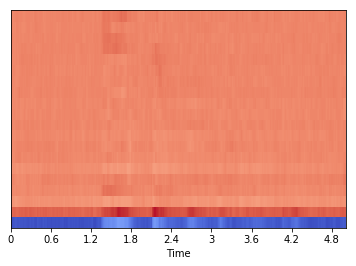

In [123]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


[ 1.88300007e-16 -1.39486257e-16  1.13211837e-16 -1.18492481e-17
  3.40021901e-17 -6.38829026e-17  1.00976201e-16  1.00461016e-17
  1.95770185e-17 -5.74430938e-17  2.06073879e-18  2.67896043e-17
  1.80314644e-17 -2.42136808e-17 -6.69740108e-17  1.15916557e-17
 -7.40578004e-19 -2.24749325e-17  4.14723682e-17  2.38272923e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


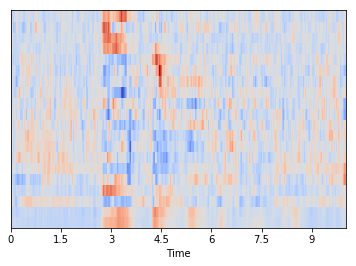

In [223]:
import sklearn

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

librosa.display.specshow(mfccs, sr=sr, x_axis='time')


In [224]:
mfccs.mean(axis=1)

array([ 1.88300007e-16, -1.39486257e-16,  1.13211837e-16, -1.18492481e-17,
        3.40021901e-17, -6.38829026e-17,  1.00976201e-16,  1.00461016e-17,
        1.95770185e-17, -5.74430938e-17,  2.06073879e-18,  2.67896043e-17,
        1.80314644e-17, -2.42136808e-17, -6.69740108e-17,  1.15916557e-17,
       -7.40578004e-19, -2.24749325e-17,  4.14723682e-17,  2.38272923e-17])

## Model Prototype
- Make a dictionary: {.wav string : ndarray
Goal:
Cols 

In [160]:
mfccs.shape[0]
feature_cols_mfcc = ['mfcc_'+str(num) if len(str(num))==2 else 'mfcc_0'+str(num) for num in range(mfccs.shape[0])]   # list of strings for DF header

 

In [263]:
cry_data = []
for file in (cry_list + silent_list):
    
    y, sr = librosa.load(file, sr=44100)
    
    mfccs = librosa.feature.mfcc(y, n_mfcc=13, sr=sr)
    
    cry_data.append(dict(zip(['label'] + feature_cols_mfcc, [int('crying' in file)] + list(mfccs.mean(axis=1)))))
     

In [265]:
cry_data

[{'label': 1,
  'mfcc_00': -768.3756639102927,
  'mfcc_01': 105.04544690977885,
  'mfcc_02': -48.949624724408686,
  'mfcc_03': 1.243085838798432,
  'mfcc_04': 0.1774943830270187,
  'mfcc_05': -28.58482648308594,
  'mfcc_06': -2.281125860258373,
  'mfcc_07': -6.560056689567767,
  'mfcc_08': -10.92798372781611,
  'mfcc_09': 1.2455383684483539,
  'mfcc_10': -6.056558473936755,
  'mfcc_11': -3.98527383409727,
  'mfcc_12': 1.8510074760302018},
 {'label': 1,
  'mfcc_00': -737.3253701803525,
  'mfcc_01': 91.27952565894627,
  'mfcc_02': -33.20654135754905,
  'mfcc_03': -3.1912564290820042,
  'mfcc_04': 1.915339032398654,
  'mfcc_05': -24.201259158060545,
  'mfcc_06': -7.922936532874955,
  'mfcc_07': -4.498896201651541,
  'mfcc_08': -10.175341374332834,
  'mfcc_09': -2.8985552529254894,
  'mfcc_10': -5.40458392409557,
  'mfcc_11': -6.221960082367527,
  'mfcc_12': -0.7468326938846164},
 {'label': 1,
  'mfcc_00': -743.9693349262634,
  'mfcc_01': 128.79586729340107,
  'mfcc_02': -54.66041205804168

In [201]:
df

,label,mfcc_00,mfcc_01,mfcc_02,mfcc_03,mfcc_04,mfcc_05,mfcc_06,mfcc_07,mfcc_08,mfcc_09,mfcc_10,mfcc_11,mfcc_12,rmse,spectral_bandwidth,spectral_centroid,spectral_rolloff,zcr
0,1.0,-768.375664,105.045447,-48.949625,1.243086,0.177494,-28.584826,-2.281126,-6.560057,-10.927984,1.245538,-6.056558,-3.985274,1.851007,0.000310,4696.654081,4268.093544,11677.112916,0.102963
1,1.0,-737.325370,91.279526,-33.206541,-3.191256,1.915339,-24.201259,-7.922937,-4.498896,-10.175341,-2.898555,-5.404584,-6.221960,-0.746833,0.000458,4355.717348,3832.486356,9814.993860,0.095094
2,1.0,-743.969335,128.795867,-54.660412,0.884953,1.064819,-30.957344,-0.893344,-11.192552,-15.319531,2.526045,-8.431053,-5.775144,1.979822,0.000377,4131.406059,3591.843705,8890.015385,0.089624
3,1.0,-708.806721,134.797340,-49.032352,3.078373,-0.894575,-36.447055,-8.697726,-12.577379,-14.441062,0.626627,-6.177967,-2.175907,4.224580,0.000839,3639.249503,3076.146098,7226.005882,0.076038
4,1.0,-707.520214,101.020843,-51.507393,4.015465,-1.706717,-33.051905,-4.922206,-7.652123,-9.674420,0.876348,-7.134992,-3.033374,3.011047,0.000731,3902.619221,3766.007534,8733.087795,0.108653
5,1.0,-735.374496,101.771306,-39.029272,-1.134859,-1.020859,-27.094090,-4.305637,-7.388106,-12.864329,-0.322308,-5.743682,-4.704314,3.133778,0.000611,4332.295475,3883.305882,10370.610454,0.094784
6,1.0,-719.320258,94.172428,-31.534587,-3.739060,-1.598073,-25.670674,-7.120582,-8.449233,-14.633028,-1.286540,-3.500054,-5.213483,2.566259,0.000625,4096.952254,3660.283359,8983.292624,0.094690
7,1.0,-749.673243,122.343298,-53.861459,6.941743,1.606771,-34.477709,-2.522637,-10.147548,-13.112390,3.855360,-9.273767,-6.060432,5.006417,0.000354,4267.586052,3809.406858,9626.241095,0.096386
8,1.0,-749.691826,110.240495,-31.887717,-0.956716,2.069629,-25.302627,-5.547010,-6.321953,-12.662641,-0.458306,-4.723887,-5.136279,2.798139,0.000530,4430.683552,3802.666460,10487.415876,0.087520
9,1.0,-777.930953,112.348019,-40.177110,4.346391,4.337541,-24.898273,0.035947,-5.863305,-12.003978,2.347249,-6.934576,-4.489240,4.147684,0.000259,4761.330503,4179.485454,11690.480895,0.095284


In [91]:
import numpy as np
list_ = [range(5),np.nan]
any(list_)
all(list_)

True

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss, accuracy_score, classification_report, roc_auc_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler
from sklearn.svm import SVC
#from sklearn_pandas import DataFrameMapper, GridSearchCV
from sklearn.model_selection import GridSearchCV

In [250]:
train, test = train_test_split(df, test_size=0.2)


In [ ]:
print(classification_report(y_))

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1),df['label'], test_size=0.2) #, stratify=df['label'])



In [183]:
logit = LogisticRegression()
svc = SVC()

scaler = StandardScaler().fit(X_train)  #FIT
X_train_scaled = scaler.transform(X_train)

svc.fit(X_train_scaled, y_train)   #FIT

X_test_scaled = scaler.transform(X_test)
y_pred = svc.predict(X_test_scaled)

parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1, 10, 100]}
svcgs = SVC()
clf = GridSearchCV(svcgs, parameters)
clf.fit(X_train_scaled, y_train)  #FIT
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

In [218]:
y_pred[0:1]

array([1.])

In [197]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [200]:
roc_auc_score(y_test, y_pred)

0.9315501869427667

In [290]:
concat.shape

(18, 369)

In [292]:
pd.DataFrame(concat)

,0,1,2,3,4,5,6,7,8,9,...,359,360,361,362,363,364,365,366,367,368
0,0.063477,0.095215,0.123535,0.119629,0.121094,0.117188,0.118652,0.120117,0.117188,0.116699,...,0.095215,0.088867,0.085938,0.094727,0.081543,0.057617,0.034180,0.004883,0.00000,0.00000
1,0.000052,0.000051,0.000052,0.000052,0.000051,0.000052,0.000053,0.000055,0.000057,0.000055,...,0.000059,0.000060,0.000058,0.000055,0.000047,0.000034,0.000024,0.000008,0.00000,0.00000
2,-817.816071,-805.647991,-803.553246,-808.905074,-810.614914,-809.605114,-804.305986,-800.174737,-800.637488,-802.151649,...,-799.985329,-798.394358,-801.670912,-808.720806,-819.165970,-850.117545,-966.427286,-1131.370850,-1131.37085,-1131.37085
3,76.107128,81.011545,83.946739,83.939707,84.122895,86.946023,91.956278,94.694985,95.026834,92.283259,...,104.419128,108.856695,105.143979,96.559339,90.083514,81.326220,68.256612,0.000000,0.00000,0.00000
4,-46.780137,-52.777577,-52.997306,-51.992924,-48.772826,-45.850875,-44.345970,-43.999956,-43.811157,-50.635482,...,-36.319606,-36.585547,-43.667213,-47.945274,-41.178261,-42.831431,-50.264386,0.000000,0.00000,0.00000
5,3.200761,-0.426217,2.327390,1.700025,0.920130,2.510577,4.728814,4.027228,2.665888,-1.845478,...,-4.090369,-5.335408,-7.517535,-6.473420,-6.372439,-0.867506,-0.645721,0.000000,0.00000,0.00000
6,2.819269,0.749026,5.783903,8.829027,5.643528,4.517905,5.323974,8.262104,10.810165,11.251998,...,4.552149,7.896367,15.104454,15.931106,11.141864,12.955966,8.168429,0.000000,0.00000,0.00000
7,-14.053236,-18.383585,-17.978960,-16.406194,-16.294492,-18.381668,-19.352272,-18.560038,-15.025434,-11.263978,...,-22.501926,-14.720946,-10.575527,-16.078378,-21.067564,-22.261733,-29.880531,0.000000,0.00000,0.00000
8,5.327186,3.953400,6.354701,8.968681,8.439512,6.162976,10.579429,9.510778,4.841742,3.622640,...,0.139129,5.035223,-0.396052,-1.481289,-5.716203,-4.606932,-11.020510,0.000000,0.00000,0.00000
9,3.205910,-0.518610,-2.484197,-4.557065,-2.199633,-3.058086,3.788005,3.829714,-1.067377,-0.685272,...,0.360679,4.409592,9.313913,11.070752,10.328481,9.871105,4.656722,0.000000,0.00000,0.00000


In [280]:
'Python'.__add__('ic')

'Pythonic'

In [281]:
from collections import Counter

c = Counter('gagggagagadd')

In [282]:
c

Counter({'a': 4, 'd': 2, 'g': 6})

In [220]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)

In [223]:
from bokeh.plotting import figure, output_file, output_notebook, show

# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

# output to static HTML file
output_notebook()#"log_lines.html")

# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend="y=x")
p.circle(x, x, legend="y=x", fill_color="white", size=8)
p.line(x, y0, legend="y=x^2", line_width=3)
p.line(x, y1, legend="y=10^x", line_color="red")
p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")

# show the results
show(p)

Loading BokehJS ...

In [226]:
import numpy as np
import bokeh
bokeh.sampledata.download()

from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL

# prepare some data
aapl = np.array(AAPL['adj_close'])
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

# output to static HTML file
output_file("stocks.html", title="stocks.py example")

# create a new plot with a a datetime axis type
p = figure(width=800, height=350, x_axis_type="datetime")

# add renderers
p.circle(aapl_dates, aapl, size=4, color='darkgrey', alpha=0.2, legend='close')
p.line(aapl_dates, aapl_avg, color='navy', legend='avg')

# NEW: customize by setting attributes
p.title.text = "AAPL One-Month Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)

Creating /Users/timcodes/.bokeh directory
Creating /Users/timcodes/.bokeh/data directory
Using data directory: /Users/timcodes/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3182088 bytes)
   3182088 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (5148539 bytes)
   5148539 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]